In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex'])

Vamos a buscar minimizar la siguiente función de peso
$$ L = \frac{1}{2N} \sum_{i} (f(x_i;w) - t_i)^2  = \frac{1}{2N} w^{T}X^{T}Xw - 2w^{T}X^{T}t + t^{T}t$$

Objetivo: Minimizo L como función de w

Iteramos el peso, en función de los parametrós, queremos encontrar el mínimo en el espacio de parametros

\begin{gather*}
    w_0 = w_{0,0} - \alpha \frac{\partial L}{\partial w_0} \\
    w_0 = w_{1,0} - \alpha \frac{\partial L}{\partial w_1} \\ 
    \vdots \qquad \vdots \\
    w_n = w_{n, 0} - \alpha \frac{\partial L}{\partial w_n}

\end{gather*}

Hay que encontrar primero el gradiente de la función de costo.

$$ \frac{\partial L}{\partial w} = \frac{1}{N} X^{T}X w - \frac{1}{N}X^{T}t $$


In [130]:
def gradiente_descendent(x, y, iterations, learning_rate, tolerance, degree = 1):
     
    datax = [x**(i) for i in range(degree+1)]
    #Definimos la X, dependiendo del grado del polinomio
    X = np.vstack(datax).T
    #Definimos w.
    current_w = np.random.uniform(-10.0, 10.0, size=degree+1)
    
    for i in range(iterations):
        
        gradient = 1/(len(x))*(X.T @ X @ current_w) - 1/(len(x))*X.T@y
        
        print(current_w)
        
        if np.all(np.abs(learning_rate*gradient) < tolerance):
            #Salimos del ciclo
            print(f'Convergio en {i} iteraciones. ')
            break
        #Actualizamos w
        
        
        
        current_w = current_w - learning_rate*gradient
    

    return current_w


data = np.loadtxt('../Data/olympic100m_men.txt', delimiter=',').T

x = data[0]
x = (x-1896)/4
y = data[1]

x_aux = np.linspace(np.min(x), np.max(x), 2500)

w = gradiente_descendent(x, y, 100000, 1e-8, 1e-10, 2)

w

[-2.79464289  6.44267957  7.41037849]
[-2.79466406  6.44221994  7.39981602]
[-2.7946852   6.44176095  7.38926814]
[-2.79470631  6.4413026   7.37873482]
[-2.79472739  6.44084487  7.36821604]
[-2.79474844  6.44038778  7.35771178]
[-2.79476947  6.43993132  7.34722203]
[-2.79479046  6.43947548  7.33674676]
[-2.79481143  6.43902028  7.32628596]
[-2.79483236  6.4385657   7.31583959]
[-2.79485327  6.43811175  7.30540765]
[-2.79487415  6.43765842  7.29499011]
[-2.794895    6.43720572  7.28458696]
[-2.79491583  6.43675365  7.27419817]
[-2.79493662  6.43630219  7.26382372]
[-2.79495738  6.43585136  7.2534636 ]
[-2.79497812  6.43540115  7.24311778]
[-2.79499883  6.43495156  7.23278624]
[-2.79501951  6.4345026   7.22246897]
[-2.79504016  6.43405425  7.21216595]
[-2.79506078  6.43360652  7.20187714]
[-2.79508137  6.4331594   7.19160255]
[-2.79510194  6.43271291  7.18134214]
[-2.79512248  6.43226702  7.17109589]
[-2.79514299  6.43182176  7.1608638 ]
[-2.79516347  6.4313771   7.15064583]
[-2.79518392

array([-2.81674267,  6.04769287, -0.23718589])

In [79]:
def poly(x, weights):
    
    y_p = 0
    for i in range(len(weights)):
        y_p += weights[i]*x**(i)
        
    return y_p 

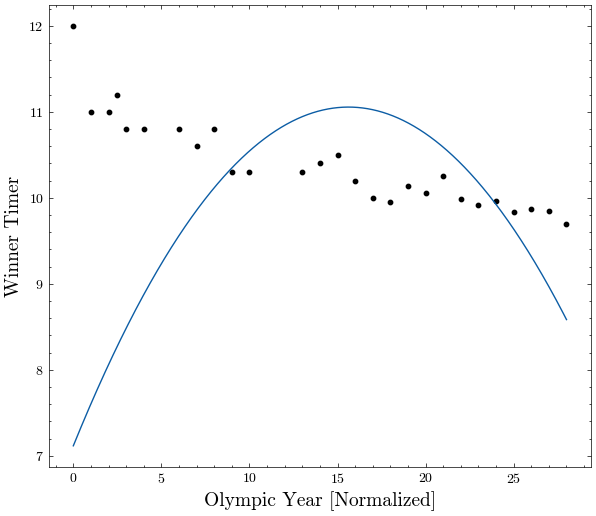

In [125]:
ig = plt.figure(figsize=(7, 6))
plt.scatter(x, y, s = 10, color = 'black')
degree = 8

plt.plot(x_aux, poly(x_aux, w))


plt.xlabel('Olympic Year [Normalized]', fontsize = 14)
plt.ylabel('Winner Timer', fontsize = 14);